## Imports

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

% matplotlib inline

## Loading the data into a pandas dataframe

In [2]:
df = pd.read_csv('training_boson.csv')
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


## EDA

In [3]:
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [55]:
# Heat map
sns.heatmap(df.corr())
plt.show()
df.corr()
# Correlation matrix

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight,Label
EventId,1.000000,-0.000077,-0.006059,-0.001851,0.002073,-0.001349,-0.000581,0.001427,-0.001209,0.003393,...,0.000345,-0.001141,0.002312,0.000175,0.002885,0.004252,0.001226,0.001024,-0.002838,0.002248
DER_mass_MMC,-0.000077,1.000000,0.168854,0.767654,0.021561,0.428331,0.011714,0.112689,0.062447,0.018133,...,0.087108,0.000433,0.079299,0.013369,0.004649,0.001733,0.004642,0.009787,0.080697,0.010569
DER_mass_transverse_met_lep,-0.006059,0.168854,1.000000,0.190109,-0.249116,0.043251,0.017758,-0.146837,0.349504,-0.419757,...,0.183716,-0.015925,-0.167811,-0.210537,-0.099721,0.000006,0.003919,-0.210009,0.419843,-0.351428
DER_mass_vis,-0.001851,0.767654,0.190109,1.000000,-0.062562,0.579712,-0.000702,0.088685,0.097490,-0.090846,...,-0.087330,-0.001467,0.053300,-0.026860,-0.053249,0.002279,0.004449,-0.052902,0.102172,-0.014055
DER_pt_h,0.002073,0.021561,-0.249116,-0.062562,1.000000,-0.539379,0.310501,0.832733,0.089187,0.539356,...,0.679585,0.008585,0.782547,0.623401,0.572249,0.001783,0.002562,0.808616,-0.414084,0.192526
DER_deltar_tau_lep,-0.001349,0.428331,0.043251,0.579712,-0.539379,1.000000,-0.148081,-0.432603,0.047046,-0.205441,...,-0.402345,-0.001570,-0.407002,-0.347904,-0.320056,0.000521,0.004397,-0.448737,0.197881,0.012245
DER_pt_tot,-0.000581,0.011714,0.017758,-0.000702,0.310501,-0.148081,1.000000,0.381160,0.039193,0.178448,...,0.269739,0.002515,0.448925,0.360409,0.165737,-0.004102,0.005753,0.403382,-0.219507,-0.015287
DER_sum_pt,0.001427,0.112689,-0.146837,0.088685,0.832733,-0.432603,0.381160,1.000000,0.108791,0.420679,...,0.520129,0.006712,0.904481,0.758503,0.606609,0.000458,0.003281,0.965628,-0.414827,0.153236
DER_pt_ratio_lep_tau,-0.001209,0.062447,0.349504,0.097490,0.089187,0.047046,0.039193,0.108791,1.000000,-0.038803,...,0.053386,-0.001186,0.049904,0.056312,0.056746,0.001968,-0.000744,0.079116,0.188398,-0.195398
DER_met_phi_centrality,0.003393,0.018133,-0.419757,-0.090846,0.539356,-0.205441,0.178448,0.420679,-0.038803,1.000000,...,0.180756,0.009896,0.423363,0.490057,0.158014,0.002282,0.001876,0.452224,-0.472163,0.271752


In [5]:
df['Label'].value_counts()
# 2:1 class imbalance
# Binarizing 'Label' column: 1 for 's', 0 for 'b'
df['Label'] = df['Label'].apply(lambda x: 1 if x == 's' else 0)
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,0
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,0
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,0
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,0


In [6]:
df.info()
# No null values, but the values in the dataframe as '-999'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
EventId                        250000 non-null int64
DER_mass_MMC                   250000 non-null float64
DER_mass_transverse_met_lep    250000 non-null float64
DER_mass_vis                   250000 non-null float64
DER_pt_h                       250000 non-null float64
DER_deltaeta_jet_jet           250000 non-null float64
DER_mass_jet_jet               250000 non-null float64
DER_prodeta_jet_jet            250000 non-null float64
DER_deltar_tau_lep             250000 non-null float64
DER_pt_tot                     250000 non-null float64
DER_sum_pt                     250000 non-null float64
DER_pt_ratio_lep_tau           250000 non-null float64
DER_met_phi_centrality         250000 non-null float64
DER_lep_eta_centrality         250000 non-null float64
PRI_tau_pt                     250000 non-null float64
PRI_tau_eta                    250000 non-null float64
PRI_tau_phi

In [7]:
df[df[df.columns] == -999].count()
# Count of -999 values in each column, designated as null

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

## Replacing negative values to with null values

In [8]:
df[['DER_mass_MMC', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality',
                'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
                'PRI_jet_subleading_phi']] = df[['DER_mass_MMC', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality',
                'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
                'PRI_jet_subleading_phi']].replace(-999, 'NaN')

In [9]:
df.head()
# Replaced negative values with null values in order to use .dropna method
# Possibly interpolate or impute the mean for columns: 'DER_mass_MMC', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta',
#'PRI_jet_leading_phi'

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.47,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,0
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,0
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,5.446378,0
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,0


In [10]:
# Check to confirm whether or not negative values were replaced
df[df[df.columns] == -999].count()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

## Imputing and Interpolating null values

### Imputing the null values

In [13]:
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0, verbose=1)
df[['DER_mass_MMC', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi']] = imp.fit_transform(df[['DER_mass_MMC', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi']])
df.head()
# Imputed with mode value

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,0
2,100002,112.406,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,0
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,0,65.561,0.000,-0.033,NaN,NaN,NaN,0.000,5.446378,0
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,0,65.561,0.000,-0.033,NaN,NaN,NaN,0.000,6.245333,0


In [14]:
imp_df = df

In [15]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0, verbose=1)
df[['DER_mass_MMC', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi']] = imp.fit_transform(df[['DER_mass_MMC', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi']])
df.head()
# Imputed with median value

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,0
2,100002,112.406,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,0
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,0,65.561,0.000,-0.033,NaN,NaN,NaN,0.000,5.446378,0
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,0,65.561,0.000,-0.033,NaN,NaN,NaN,0.000,6.245333,0


In [16]:
imp_med_df = df

### Interpolating the null values

In [11]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.47,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,0
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,0
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,5.446378,0
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,0


In [12]:
df[['DER_mass_MMC', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi']] = df[['DER_mass_MMC', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi']].astype(float)
df[['DER_mass_MMC', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi']] = df[['DER_mass_MMC', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi']].interpolate(method='linear')
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150000,0.444000,46.062,1.24,-2.475,113.497,0.002653,1
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,1,46.226,0.725000,1.158000,NaN,NaN,NaN,46.226,2.233584,0
2,100002,152.421,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,1,44.251,2.053000,-2.028000,NaN,NaN,NaN,44.251,2.347389,0
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,0,59.683,0.564667,-1.569667,NaN,NaN,NaN,0.000,5.446378,0
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,0,75.115,-0.923667,-1.111333,NaN,NaN,NaN,0.000,6.245333,0


In [13]:
interpolate_df = df

## Initial Modeling

### Establishing the baseline accuracy

In [14]:
baseline = 1 - df['Label'].mean()
baseline
# baseline accuracy is approx. 65.73%
# The models must produce a better accuracy than the baseline

0.657332

### Modeling using the imputed data

In [18]:
X = imp_med_df[[x for x in imp_df.columns if x not in ['EventId', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
                                                  'DER_lep_eta_centrality', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
                                                  'PRI_jet_subleading_phi', 'Label']]]
y = imp_med_df['Label']

In [15]:
X = interpolate_df[['PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
           'PRI_met_sumet', 'PRI_jet_num']]
y = interpolate_df['Label']

## PCA

In [24]:
pca = PCA(n_components=10, svd_solver='randomized')
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [25]:
print(pca.explained_variance_ratio_)  

[ 0.78060301  0.08125268  0.03826031  0.02645052  0.02524612  0.01351896
  0.01196746  0.00763381  0.00656448  0.00526535]


In [26]:
print(pca.singular_values_)

[ 102321.18058626   33011.8059943    22652.94416012   18835.0837073
   18401.26964718   13465.48967856   12669.26633391   10118.61794368
    9383.19297495    8403.57154925]


In [ ]:
# PRI_tau_pt                          
# PRI_tau_eta                         
# PRI_tau_phi                         
# PRI_lep_pt                          
# PRI_lep_eta                         
# PRI_lep_phi                         
# PRI_met                             
# PRI_met_phi                         
# PRI_met_sumet                       
# PRI_jet_num                         
# PRI_jet_leading_pt              
# PRI_jet_leading_eta             
# PRI_jet_leading_phi 
# PRI features

## Preprocessing

In [152]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [153]:
# Scaling
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Grid Search using Random Forest Classifier

In [46]:
rfregr = RandomForestClassifier()
rfregr_params = {'n_estimators': [20],
                'max_features': ['auto', 'sqrt', 'log2', None],
                'max_depth': range(2, 5),}
rfregr_model = GridSearchCV(rfregr, rfregr_params)
rfregr_model.fit(X_train, y_train)
print('best score', rfregr_model.best_score_)
print('best params', rfregr_model.best_params_)
print('test score', rfregr_model.score(X_test, y_test))

best score 0.806346268657
best params {'max_depth': 4, 'max_features': None, 'n_estimators': 20}
test score 0.806351515152


In [88]:
rfc = RandomForestClassifier(n_estimators=50, criterion='entropy', max_features='auto')

In [113]:
rfc.fit(X_train, y_train)
print('test score', rfc.score(X_test, y_test))
print('train score', rfc.score(X_train, y_train))

test score 0.832109090909
train score 0.999719402985


In [114]:
rfc.feature_importances_ 

array([ 0.11948447,  0.11061763,  0.08174118,  0.03761094,  0.05418707,
        0.03303379,  0.03831488,  0.04488021,  0.05320067,  0.06034567,
        0.02931162,  0.02595676,  0.03104029,  0.03073489,  0.0260843 ,
        0.04541457,  0.02597661,  0.03129747,  0.0082643 ,  0.02769204,
        0.03669422,  0.02648205,  0.02163437])

In [115]:
X.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,...,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150000,0.444000,113.497
1,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,...,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725000,1.158000,46.226
2,152.421,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,...,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053000,-2.028000,44.251
3,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,...,-0.522,-3.100,31.082,0.060,86.062,0,59.683,0.564667,-1.569667,0.000
4,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,...,0.798,1.569,2.723,-0.871,53.131,0,75.115,-0.923667,-1.111333,0.000


In [116]:
X.shape

(250000, 23)

In [117]:
model = SelectFromModel(rfc, prefit=True)
X_new = model.transform(X)
X_new.shape

(250000, 8)

In [106]:
X_new

array([[-0.39044897, -0.68542473, -0.30392182, ...,  1.29240616,
        -0.45480934, -0.75014645],
       [-0.39522968, -1.26312801, -0.45301009, ...,  1.16005763,
         0.00574476, -0.64233116],
       [-0.32928499, -0.89294729, -0.53794344, ...,  1.19356359,
        -0.35386659,  0.30666048],
       ..., 
       [-0.20934739, -0.65710567, -0.13784196, ...,  1.28151672,
        -0.30502332, -1.12985164],
       [-1.03316342, -0.36205658, -0.69128575, ...,  0.98750196,
        -0.4926796 , -0.79497903],
       [-0.36802339,  0.84036018,  0.12635141, ..., -1.07227663,
        -0.612669  , -0.11160616]])

### Evaluating the model

In [61]:
rfc.predict(X.iloc[0:100, :])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [62]:
print(y[0:100])

0     1
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    1
27    1
28    1
29    0
     ..
70    1
71    1
72    0
73    1
74    0
75    1
76    0
77    0
78    1
79    1
80    0
81    0
82    1
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    0
93    1
94    0
95    0
96    1
97    1
98    0
99    0
Name: Label, Length: 100, dtype: int64


In [63]:
rfc.predict_proba(X.iloc[0:100, :])

array([[ 0.8 ,  0.2 ],
       [ 0.82,  0.18],
       [ 0.6 ,  0.4 ],
       [ 0.74,  0.26],
       [ 0.82,  0.18],
       [ 0.72,  0.28],
       [ 0.8 ,  0.2 ],
       [ 0.74,  0.26],
       [ 0.72,  0.28],
       [ 0.68,  0.32],
       [ 0.84,  0.16],
       [ 0.64,  0.36],
       [ 0.74,  0.26],
       [ 0.76,  0.24],
       [ 0.7 ,  0.3 ],
       [ 0.74,  0.26],
       [ 0.82,  0.18],
       [ 0.82,  0.18],
       [ 0.8 ,  0.2 ],
       [ 0.82,  0.18],
       [ 0.78,  0.22],
       [ 0.78,  0.22],
       [ 0.76,  0.24],
       [ 0.82,  0.18],
       [ 0.64,  0.36],
       [ 0.72,  0.28],
       [ 0.72,  0.28],
       [ 0.76,  0.24],
       [ 0.72,  0.28],
       [ 0.72,  0.28],
       [ 0.74,  0.26],
       [ 0.8 ,  0.2 ],
       [ 0.74,  0.26],
       [ 0.7 ,  0.3 ],
       [ 0.62,  0.38],
       [ 0.66,  0.34],
       [ 0.74,  0.26],
       [ 0.78,  0.22],
       [ 0.8 ,  0.2 ],
       [ 0.76,  0.24],
       [ 0.74,  0.26],
       [ 0.78,  0.22],
       [ 0.72,  0.28],
       [ 0.

In [64]:
predicted = rfc.predict(X)

In [65]:
confusion_matrix(y, predicted)

array([[164332,      1],
       [ 85667,      0]], dtype=int64)

In [66]:
print(accuracy_score(y, predicted))

0.657328


In [19]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

## Using Interpolated Data for Modeling

In [35]:
X = interpolate_df[[x for x in interpolate_df.columns if x not in ['EventId', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
                                                  'DER_lep_eta_centrality', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
                                                  'PRI_jet_subleading_phi', 'Weight', 'Label']]]
y = interpolate_df['Label']

In [67]:
linsvc = LinearSVC()
clf = CalibratedClassifierCV(linsvc)
clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
            cv=3, method='sigmoid')

In [68]:
clf.score(X_test, y_test)

0.73743030303030299

In [131]:
y_pred = clf.predict(X_test)
y_pp = clf.predict_proba(X_test)
y_pp

array([[ 0.91007074,  0.08992926],
       [ 0.92682663,  0.07317337],
       [ 0.06801018,  0.93198982],
       ..., 
       [ 0.88657936,  0.11342064],
       [ 0.09892504,  0.90107496],
       [ 0.11535874,  0.88464126]])

In [70]:
y_pp = pd.DataFrame(clf.predict_proba(X_test), columns = ['class_0_pp', 'class_1_pp'])
y_pp.head()

,class_0_pp,class_1_pp
0,0.808974,0.191026
1,0.231497,0.768503
2,0.798225,0.201775
3,0.686387,0.313613
4,0.588049,0.411951


In [71]:
logreg = LogisticRegression()

In [154]:
clf = CalibratedClassifierCV(logreg)
clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
            cv=3, method='sigmoid')

In [155]:
clf.score(X_test, y_test)

0.73763636363636365

In [134]:
y_pred = clf.predict(X_test)
y_pp = clf.predict_proba(X_test)
y_pp

array([[ 0.70131353,  0.29868647],
       [ 0.83680015,  0.16319985],
       [ 0.1156176 ,  0.8843824 ],
       ..., 
       [ 0.78310745,  0.21689255],
       [ 0.34926936,  0.65073064],
       [ 0.42415528,  0.57584472]])

In [139]:
y_pp = pd.DataFrame(clf.predict_proba(X_test), columns = ['class_0_pp', 'class_1_pp'])
y_pp.head()

,class_0_pp,class_1_pp
0,0.701314,0.298686
1,0.836800,0.163200
2,0.115618,0.884382
3,0.491345,0.508655
4,0.652349,0.347651


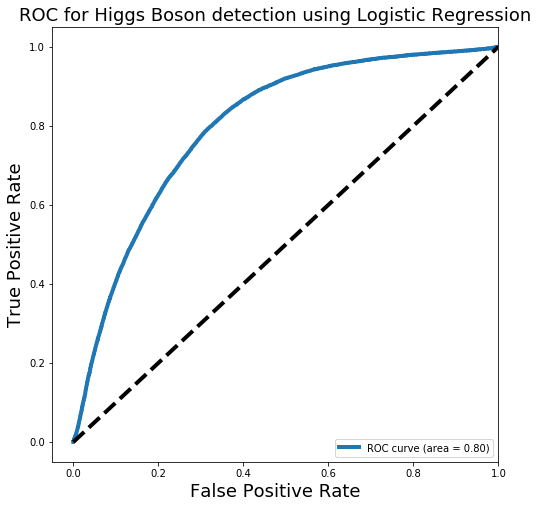

In [140]:
fpr, tpr, thresh = roc_curve(y_test, y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Higgs Boson detection using Logistic Regression', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [142]:
rfc = RandomForestClassifier(n_estimators=50, criterion='entropy', max_features='auto')
clf = CalibratedClassifierCV(rfc)
clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
            cv=3, method='sigmoid')

In [143]:
clf.score(X_test, y_test)

0.83300606060606064

### Constructing a ROC Curve for Model Evaluation: Random Forest Regressor with CalibratedClassifierCV

In [145]:
y_pred = clf.predict(X_test)
y_pp = clf.predict_proba(X_test)
y_pp

array([[ 0.88823679,  0.11176321],
       [ 0.94170372,  0.05829628],
       [ 0.06874778,  0.93125222],
       ..., 
       [ 0.90594365,  0.09405635],
       [ 0.12817608,  0.87182392],
       [ 0.09989582,  0.90010418]])

In [146]:
y_pp = pd.DataFrame(clf.predict_proba(X_test), columns = ['class_0_pp', 'class_1_pp'])
y_pp.head()

,class_0_pp,class_1_pp
0,0.888237,0.111763
1,0.941704,0.058296
2,0.068748,0.931252
3,0.175449,0.824551
4,0.808262,0.191738


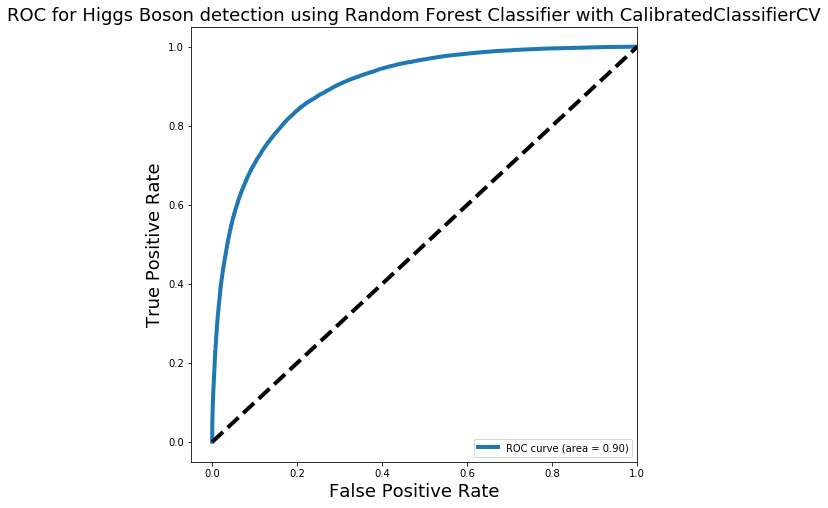

In [147]:
fpr, tpr, thresh = roc_curve(y_test, y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Higgs Boson detection using Random Forest Classifier with CalibratedClassifierCV', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [41]:
adbst = AdaBoostClassifier()
adbst.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [42]:
adbst.score(X_test, y_test)

0.80631515151515154

In [43]:
gboost = GradientBoostingClassifier()
clf = CalibratedClassifierCV(gboost)
clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
            cv=3, method='sigmoid')

In [44]:
clf.score(X_test, y_test)

0.80916363636363642

### Confusion Matrix for Model Evaluation

In [130]:
conmat = np.array(confusion_matrix(y_test, y_pred))
confusion = pd.DataFrame(conmat, index = ['is_background_noise', 'is_signal'], columns = ['predicted_background_noise', 'predicted_signal'])

confusion

# Confusion matrix shows that the model is good at classifying background noise, however there are quite a few misclassifications
# of the signal

,predicted_background_noise,predicted_signal
is_background_noise,49021,5207
is_signal,8496,19776


In [84]:
y_score = clf.predict_proba(X_test)[:,1]

### AUC Score

In [85]:
print (roc_auc_score(y_test, y_score))
# This is a fantastic AUC score

0.903101534637


In [39]:
y_score = rfregr_model.best_estimator_.predict_proba(X_test)[:,1]

In [136]:
target_names = ['background noise', 'signal']

### Classification Report for Model Evaluation

In [137]:
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

background noise       0.77      0.85      0.81     54228
          signal       0.65      0.52      0.58     28272

     avg / total       0.73      0.74      0.73     82500

